In [30]:
import pandas as pd
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

csv_path=os.path.join('..', 'data', 'month_csv_files', 'flow_counts_2022-10_ZurichSchlieren.csv')


df= pd.read_csv(csv_path)

In [31]:
df[500:1000]

,location_name,datetime,visitor_count_fw,visitor_count_fw_male,visitor_count_fw_female,visitor_count_bw,visitor_count_bw_male,visitor_count_bw_female
500,"Zürich, Schlieren",2022-10-02T15:40Z,0,0,0,0,0,0
501,"Zürich, Schlieren",2022-10-02T15:45Z,0,0,0,0,0,0
502,"Zürich, Schlieren",2022-10-02T15:50Z,0,0,0,0,0,0
503,"Zürich, Schlieren",2022-10-02T15:55Z,0,0,0,0,0,0
504,"Zürich, Schlieren",2022-10-02T16:00Z,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
995,"Zürich, Schlieren",2022-10-04T08:55Z,2,2,0,1,1,0
996,"Zürich, Schlieren",2022-10-04T09:00Z,1,0,1,1,0,0
997,"Zürich, Schlieren",2022-10-04T09:05Z,1,0,0,2,2,0
998,"Zürich, Schlieren",2022-10-04T09:10Z,3,2,1,2,2,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8903 entries, 0 to 8902
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   location_name            8903 non-null   object
 1   datetime                 8903 non-null   object
 2   visitor_count_fw         8903 non-null   int64 
 3   visitor_count_fw_male    8903 non-null   int64 
 4   visitor_count_fw_female  8903 non-null   int64 
 5   visitor_count_bw         8903 non-null   int64 
 6   visitor_count_bw_male    8903 non-null   int64 
 7   visitor_count_bw_female  8903 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 556.6+ KB


In [33]:
from datetime import date, time, datetime

def string_to_date_time(string_datetime):
    #string_datetime=df.datetime.iloc[0]
    [string_date, string_time]=string_datetime[:-1].split('T')
    [string_hour,string_minute]=string_time.split(':')
    [string_year,string_month, string_day]=string_date.split('-')
    date1=date(year=int(string_year), month=int(string_month), day=int(string_day))
    time1=time(hour=int(string_hour), minute=int(string_minute))
    time_numeric= np.round(int(string_hour)+float(string_minute)/60,2)
    return date1, time1, time_numeric

In [34]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

smoothing_conv_param=3
df['smooth_visitor_count_fw']=smooth(df.visitor_count_fw,smoothing_conv_param)
df['smooth_visitor_count_bw']=smooth(df.visitor_count_bw,smoothing_conv_param)



In [35]:
df['date']=df.apply(lambda row: string_to_date_time(row['datetime'])[0],axis=1)
df['time']=df.apply(lambda row: string_to_date_time(row['datetime'])[1],axis=1)
df['time_num']=df.apply(lambda row: string_to_date_time(row['datetime'])[2],axis=1)


In [36]:
df.groupby(by='date')['visitor_count_fw','visitor_count_bw'].sum()

C:\Users\mefl\AppData\Local\Temp\ipykernel_17052\43985447.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(by='date')['visitor_count_fw','visitor_count_bw'].sum()


,visitor_count_fw,visitor_count_bw
date,,
2022-09-30,0,0
2022-10-01,1,1
2022-10-02,1,1
2022-10-03,330,309
2022-10-04,413,411
2022-10-05,418,408
2022-10-06,368,359
2022-10-07,248,243
2022-10-08,0,0


In [37]:
by_date=df.groupby(by='date')
date1=date(year=2022, month=10, day=6)
example_day_df=by_date.get_group(date1)
example_day_df

,location_name,datetime,visitor_count_fw,visitor_count_fw_male,visitor_count_fw_female,visitor_count_bw,visitor_count_bw_male,visitor_count_bw_female,smooth_visitor_count_fw,smooth_visitor_count_bw,date,time,time_num
1464,"Zürich, Schlieren",2022-10-06T00:00Z,0,0,0,0,0,0,0.0,0.0,2022-10-06,00:00:00,0.00
1465,"Zürich, Schlieren",2022-10-06T00:05Z,0,0,0,0,0,0,0.0,0.0,2022-10-06,00:05:00,0.08
1466,"Zürich, Schlieren",2022-10-06T00:10Z,0,0,0,0,0,0,0.0,0.0,2022-10-06,00:10:00,0.17
1467,"Zürich, Schlieren",2022-10-06T00:15Z,0,0,0,0,0,0,0.0,0.0,2022-10-06,00:15:00,0.25
1468,"Zürich, Schlieren",2022-10-06T00:20Z,0,0,0,0,0,0,0.0,0.0,2022-10-06,00:20:00,0.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747,"Zürich, Schlieren",2022-10-06T23:35Z,0,0,0,0,0,0,0.0,0.0,2022-10-06,23:35:00,23.58
1748,"Zürich, Schlieren",2022-10-06T23:40Z,0,0,0,0,0,0,0.0,0.0,2022-10-06,23:40:00,23.67
1749,"Zürich, Schlieren",2022-10-06T23:45Z,0,0,0,0,0,0,0.0,0.0,2022-10-06,23:45:00,23.75
1750,"Zürich, Schlieren",2022-10-06T23:50Z,0,0,0,0,0,0,0.0,0.0,2022-10-06,23:50:00,23.83


In [38]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join('..','reports','figures', fig_id + "." + fig_extension)
    print("Saving figure", path)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

for date, day_frame in by_date:
    df_fw_count= day_frame.set_index('time_num')['smooth_visitor_count_fw']
    df_bw_count= day_frame.set_index('time_num')['smooth_visitor_count_bw']

    plt.plot(df_fw_count)
    plt.plot(df_bw_count)
    plt.legend(['incoming_count', 'outgoing_count'])
    days = ["Monday", "Tuesday", "Wednesday",
        "Thursday", "Friday", "Saturday", "Sunday"]
    fig_title=date.strftime('%Y_%m_%d')+' '+ days[date.weekday()]
    plt.title(fig_title)
    fig_id='fw_bw_count_on_'+date.strftime('%Y_%m_%d')
    #save_fig(fig_id)
    plt.clf()


<Figure size 640x480 with 0 Axes>

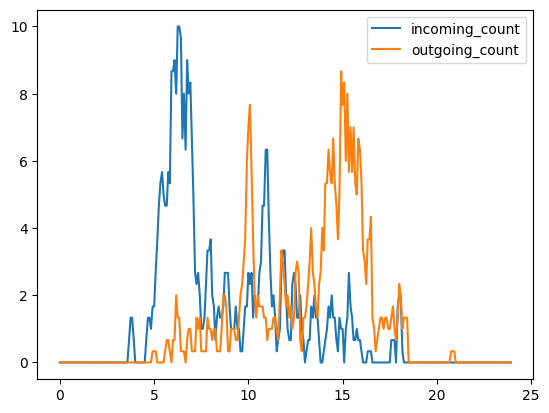

In [39]:
import matplotlib as mpl
import matplotlib.pyplot as plt






df_fw_count= example_day_df.set_index('time_num')['smooth_visitor_count_fw']
df_bw_count= example_day_df.set_index('time_num')['smooth_visitor_count_bw']

plt.plot(df_fw_count)
plt.plot(df_bw_count)
plt.legend(['incoming_count', 'outgoing_count'])


In [40]:
int(example_day_df.time[1464].strftime('%H%M'))


0

In [41]:
vis_count_fw=example_day_df.set_index('time').visitor_count_fw


In [42]:
df[['date', 'visitor_count_fw']].groupby('date').transform('cumsum')


,visitor_count_fw
0,0
1,0
2,0
3,0
4,0
...,...
8898,360
8899,360
8900,360
8901,360


In [43]:
df['cum_sum_visitor_count_fw']=df[['date', 'visitor_count_fw']].groupby('date').cumsum(axis=0)

In [44]:
df.head()

,location_name,datetime,visitor_count_fw,visitor_count_fw_male,visitor_count_fw_female,visitor_count_bw,visitor_count_bw_male,visitor_count_bw_female,smooth_visitor_count_fw,smooth_visitor_count_bw,date,time,time_num,cum_sum_visitor_count_fw
0,"Zürich, Schlieren",2022-09-30T22:00Z,0,0,0,0,0,0,0.0,0.0,2022-09-30,22:00:00,22.00,0
1,"Zürich, Schlieren",2022-09-30T22:05Z,0,0,0,0,0,0,0.0,0.0,2022-09-30,22:05:00,22.08,0
2,"Zürich, Schlieren",2022-09-30T22:10Z,0,0,0,0,0,0,0.0,0.0,2022-09-30,22:10:00,22.17,0
3,"Zürich, Schlieren",2022-09-30T22:15Z,0,0,0,0,0,0,0.0,0.0,2022-09-30,22:15:00,22.25,0
4,"Zürich, Schlieren",2022-09-30T22:20Z,0,0,0,0,0,0,0.0,0.0,2022-09-30,22:20:00,22.33,0


In [45]:
days = ["Monday", "Tuesday", "Wednesday",
            "Thursday", "Friday", "Saturday", "Sunday"]
df['weekday'] = df.apply(lambda row: days[row['date'].weekday()], axis=1)

In [46]:
from datetime import date, time, datetime, timedelta

summer_time_start=date(year=2022, month=3, day=27)
summer_time_end=date(year=2022, month=8, day=30)

ex_day=date(year=2022, month=4,day=23)

ex_day < summer_time_end

True

In [47]:
ex_day+timedelta(hours=121)

datetime.date(2022, 4, 28)

In [48]:
datetime1=datetime(year=2022, month=10,day=23,hour=13,minute=23)
datetime1.month

10